# 迴歸問題

## 郭耀仁

## 迴歸問題有哪些？

- 利用月收入來核定信用卡額度
- 利用坪數、房間數來預測房價
- 利用每日最高氣溫來預測飲料店的冰紅茶銷量
- ...etc.

## 大家都在尋找 $f$

$$y = f(x)$$

- 但沒有人知道 $f$ 到底為何、是否存在？我們只能假設：

$$\hat{y} = h(x)$$

## 當 $\hat{y}$ 與 $y$ 之間的差異愈小，我們更有自信地說 $h$ 跟 $f$ 愈相似

- 成本函數

$$ \text{minimize:} \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2$$

## 將 $h$ 表示得更完整：只有一個觀測值的時候

$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- 假如我們令 $x_0 = 1$，就可以將式子廣義地表示為：

$$\hat{y} = h(x) = \begin{bmatrix} \theta_0 & \theta_1 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\.\\.\\.\\ x_n \end{bmatrix} = \theta^{T}x$$

## 將 $h$ 表示得更完整：有 m+1 個觀測值的時候

$$\hat{y} = h(X) = 
\begin{bmatrix} x_{00}, x_{01}, ..., x_{0n} \\ x_{10}, x_{11}, ..., x_{1n} \\.\\.\\.\\ x_{m0}, x_{m1}, ..., x_{mn}
\end{bmatrix}
\begin{bmatrix} \theta_0 \\ \theta_1 \\.\\.\\.\\ \theta_n \end{bmatrix} = X\theta$$

## 迴歸問題與房屋價格資料

## House Prices: Advanced Regression Techniques

<https://www.kaggle.com/c/house-prices-advanced-regression-techniques>

In [1]:
import pandas as pd

train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
test_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/test.csv"
labeled = pd.read_csv(train_url)
test = pd.read_csv(test_url)
print(labeled.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [2]:
labeled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 什麼是標籤資料（labeled data）？

- 機器學習中的 E(Experience) 要素
- 可進一步再切割為訓練與驗證樣本

## 什麼是訓練（train）樣本？

- 由標籤資料切割出來
    - 通常分出 70% 作為訓練樣本
- 訓練樣本用來建立 $h(x)$

## 什麼是驗證（validation）樣本？

- 由標籤資料切割出來
    - 通常分出 30% 作為驗證樣本
- 驗證樣本投入 $h(x)$ 產出預測值 $\hat{y}$
- 比對驗證樣本的 $y$ 與 $\hat{y}$ 來評估 $h(x)$ 的績效（performance）

## 什麼是測試（test）樣本？

- 測試樣本是沒有標籤的資料
- 將測試樣本投入 $h(x)$ 能夠建立預測值 $\hat{y}$
- 利用 $\hat{y}$ 做出預測並應用在正式環境中
- 僅能以實驗在事後量測績效

## 如何切割訓練與驗證樣本？

- 隨機排序標籤資料的觀測值（Random shuffle）
- 再利用索引值分割（Subset）

## 隨堂練習：自己來切割訓練、驗證樣本

```python
def my_train_test_split(train, test_size=0.3, random_state=123)
    # ...
```

## 往後請 sklearn 來切割

In [4]:
# 切割訓練與驗證樣本
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(labeled, test_size=0.3, random_state=123)
print(labeled.shape)
print(train_df.shape)
print(validation_df.shape)

(1460, 81)
(1022, 81)
(438, 81)


## 將訓練與驗證樣本描繪出來

- 挑一個變數來預測 SalePrice
- 利用 Correlation Matrix 來找一個變數

In [5]:
labeled.corr()["SalePrice"].abs().sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train_df["GrLivArea"], train_df["SalePrice"], label='train', s=3)
plt.scatter(validation_df["GrLivArea"], validation_df["SalePrice"], label='validation', s=3)
plt.legend()

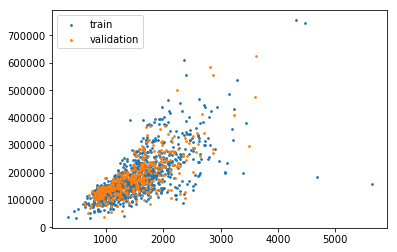

In [7]:
plt.show()

## 任務

- 找到一組 $\theta$ 讓成本函數最小化

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_train = train_df["GrLivArea"].values.reshape(-1, 1)
y_train = train_df["SalePrice"].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)
xfit = np.linspace(X_train.min() - 10, X_train.max() + 10, 100).reshape(-1, 1)
yfit = reg.predict(xfit)

plt.scatter(train_df["GrLivArea"], train_df["SalePrice"], label='train', s=3, color="#4286f4")
plt.scatter(validation_df["GrLivArea"], validation_df["SalePrice"], label='validation', s=3, color="#f4a041")
plt.plot(xfit, yfit, color="#4286f4", linewidth=2, label='thetas')
plt.legend()

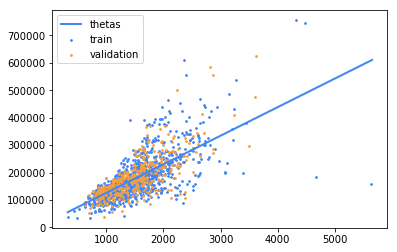

In [9]:
plt.show()

## 完成任務的方法

- Normal Equation
- Gradient Descent

## Normal Equation

In [10]:
train_df[["GrLivArea", "SalePrice"]].head()

,GrLivArea,SalePrice
376,914,148000
250,1306,76500
228,912,125000
40,1324,160000
428,1208,195400


In [11]:
train_df[["GrLivArea", "SalePrice"]].tail()

,GrLivArea,SalePrice
1041,1632,173000
1122,960,112000
1346,2156,262500
1406,768,133000
1389,1218,131000


## 線性聯立方程組

\begin{eqnarray}
\theta_0 + 914 \theta_1 &=& 148000 \nonumber \\
... \\
\theta_0 + 1218 \theta_1 &=& 131000 \nonumber \\
\end{eqnarray}

## 以向量與矩陣表示

\begin{equation}
X = \begin{bmatrix}
1 & 914\\
... & ...\\
1 & 1218
\end{bmatrix}, \quad
\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 
\end{bmatrix}, \quad \mathrm{and} 
\quad y = \begin{bmatrix}
148000 \\
... \\
131000 
\end{bmatrix}
\end{equation}

## 如果 $X^TX$ 可逆

\begin{eqnarray}
X\theta = y \\
\theta = (X^T X)^{-1} X^T y
\end{eqnarray}

## 獲得 $\theta$ 的推導過程源自於成本函數的最小化

\begin{eqnarray}
\text{minimize:} \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2 \\
\text{minimize:} J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y) \\
\text{minimize:} J(\theta) = \frac{1}{2m}[(X\theta)^T - y^T)(X\theta - y)] \\
\text{minimize:} J(\theta) = \frac{1}{2m}[(X\theta)^TX\theta - (X\theta)^Ty - y^T(X\theta) + y^Ty] \\
\text{minimize:} J(\theta) = \frac{1}{2m}[\theta^TX^TX\theta - 2(X\theta)^Ty + y^Ty] \\
\frac{\partial J}{\partial \theta} = \frac{1}{2m}[2X^TX\theta - 2X^Ty] = 0 \\
X^TX\theta = X^Ty \\
\theta = (X^T X)^{-1} X^T y
\end{eqnarray}

In [12]:
X_train = train_df["GrLivArea"].values.reshape(-1, 1)
X_train

array([[ 914],
       [1306],
       [ 912],
       ..., 
       [2156],
       [ 768],
       [1218]])

In [13]:
y_train = train_df["SalePrice"].values.reshape(-1, 1)
y_train

array([[148000],
       [ 76500],
       [125000],
       ..., 
       [262500],
       [133000],
       [131000]])

In [14]:
m = X_train.shape[0]
ones_col = np.ones((m, 1), dtype=int)
X_train = np.concatenate((ones_col, X_train), axis=1)
X_train

array([[   1,  914],
       [   1, 1306],
       [   1,  912],
       ..., 
       [   1, 2156],
       [   1,  768],
       [   1, 1218]])

In [15]:
LHS = np.dot(np.transpose(X_train), X_train)
RHS = np.dot(np.transpose(X_train), y_train)

In [16]:
thetas = np.dot(np.linalg.inv(LHS), RHS)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]
print("讓成本函數最小的 Theta")
print("Theta_0:{:.4f}, Theta_1:{:.4f}".format(theta_0, theta_1))

讓成本函數最小的 Theta
Theta_0:21905.1315, Theta_1:104.0985


## 隨堂練習：求得 $\theta$ 後將 $y = \theta_0 + \theta_1x$ 畫出

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_train = train_df["GrLivArea"].values.reshape(-1, 1)
y_train = train_df["SalePrice"].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)
xfit = np.linspace(X_train.min() - 10, X_train.max() + 10, 100).reshape(-1, 1)
yfit = reg.predict(xfit)

plt.scatter(train_df["GrLivArea"], train_df["SalePrice"], label='train', s=3, color="#4286f4")
plt.scatter(validation_df["GrLivArea"], validation_df["SalePrice"], label='validation', s=3, color="#f4a041")
plt.plot(xfit, yfit, color="#4286f4", linewidth=2, label='thetas')
plt.legend()

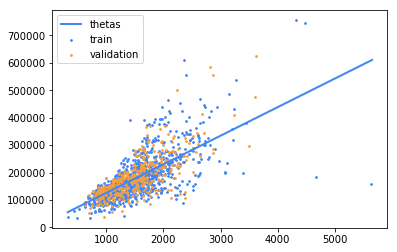

In [18]:
plt.show()

## Gradient Descent

## $h(x)$：

$$h(x) = \theta_0 + \theta_1x_1$$

## 先簡化成只有 $\theta_1$：

$$h(x) = \theta_1x_1$$

## 在 $100 < \theta_1 < 110$ 之間打點來計算成本函數 $J(\theta_1)$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

theta_1_arr = np.linspace(100, 108, 50)
x_arr = np.linspace(X_train.min(), X_train.max(), 50)
y_arr = 104*x_arr
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x_arr, y_arr))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Cost Function Visualized")

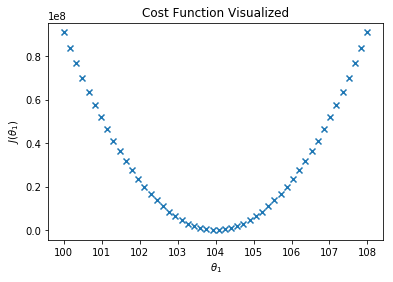

In [20]:
plt.show()

## 假如我們的運氣不好，在一個沒有包含 $\theta_1$ 的區間尋找怎麼辦？

## 透過很聰明的方式：Gradient Descent

> 每組 $\theta$ 所得的成本函數偏微分取得斜率，利用這個斜率逐步取得局部最佳解。

$$
\text{minimize:} J(\theta) = \frac{1}{2m}[\theta^TX^TX\theta - 2(X\theta)^Ty + y^Ty] \\
\frac{\partial J}{\partial \theta} = \frac{1}{2m}[2X^TX\theta - 2X^Ty] = 0 \\
\theta := \theta - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta} J(\theta) \\
\theta := \theta - \alpha \frac{1}{m}(X^TX\theta - X^Ty) \\
\theta := \theta - \alpha \frac{1}{m}[X^T(X\theta - y)]
$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.plot(1.75, cost_function(1.75, x, y), marker = 'D', markersize = 12, color = 'y')
plt.plot(0.5, cost_function(0.5, x, y), marker = 'o', markersize = 12, color = 'g')
plt.plot(1, cost_function(1, x, y), marker = '^', markersize = 12, color = 'r')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("Gradient Descent with $\\theta_1$")

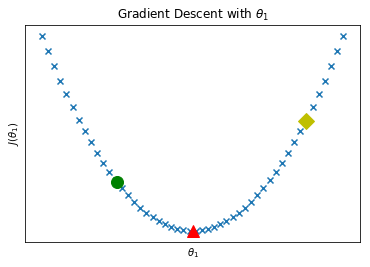

In [22]:
plt.show()

## 如何做修正

- $\theta_1$ 位於綠圓點，$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為負值，所以 $\theta_1$ 會向右邊修正
- $\theta_1$ 位於黃方塊，$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為正值，所以 $\theta_1$ 會向左邊修正
- $\theta_1$ 位於紅三角，$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為零，$\theta_1$ 收斂

## $\theta_1$ 修正的速度與 $\alpha$ 相關，$\alpha$ 稱為學習速率

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.1, 1, 15)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r', lw = 0)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("Optimal Gradient Descent")

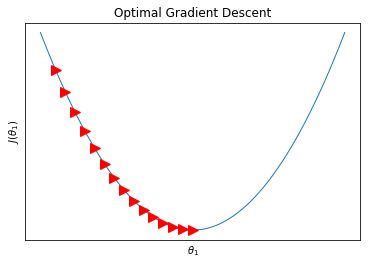

In [24]:
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.05, 1, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 6, color = 'r')
plt.xticks([]), plt.yticks([])
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too small")

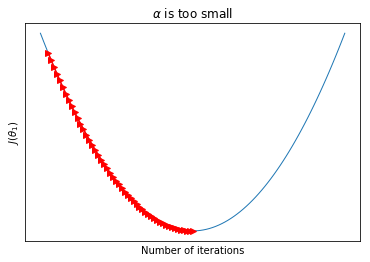

In [26]:
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.array((0.75, 1.5, 0.25, 1.8, 0.1))
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("$\\alpha$ is too large")

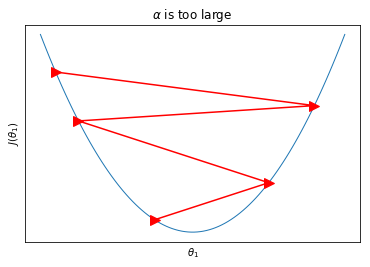

In [28]:
plt.show()

## 怎麼挑選學習速率

- 如果學習速率夠小，成本函數每一次都會下降
- 學習速率太小，收斂的速度太慢
- 學習速率太大，可能會無法收斂

In [29]:
import numpy as np

def compute_cost(X, y, thetas = np.array([0, 0]).reshape(2, 1)):
    m = y.shape[0]
    h = X.dot(thetas)
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [30]:
def gradient_descent(X, y, alpha=0.01, num_iters=1500):
    thetas = np.array([0, 0]).reshape(2, 1)
    m = y.shape[0]
    J_history = np.zeros(num_iters)
    
    for num_iter in range(num_iters):
        h = X.dot(thetas)
        loss = h - y
        gradient = X.T.dot(loss) / m
        thetas = thetas - alpha * gradient
        J_history[num_iter] = compute_cost(X, y, thetas=thetas)
    return thetas, J_history

In [31]:
import numpy as np

X_train = train_df["GrLivArea"].values.reshape(-1, 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
y_train = train_df["SalePrice"].values.reshape(-1, 1)

thetas, cost_J = gradient_descent(X_train, y_train, alpha=0.000000001, num_iters=5000)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]
print("讓成本函數最小的 Thetas")
print("Theta_0:{:.4f}, Theta_1:{:.4f}".format(theta_0, theta_1))
plt.plot(cost_J)
plt.ylabel(r"$J(\theta)$")
plt.xlabel('Iterations')

讓成本函數最小的 Thetas
Theta_0:0.0806, Theta_1:116.9090


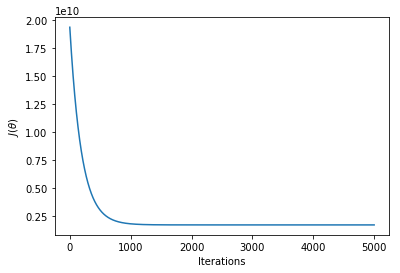

In [32]:
plt.show()

## 如何將梯度遞減利用視覺化呈現觀察

- 利用 `mpl_toolkits.mplot3d` 模組的 `Axes3D`

In [33]:
from mpl_toolkits.mplot3d import Axes3D

def surface_plot(theta0_range, theta1_range, X, y):
    theta0_start, theta0_end = theta0_range
    theta1_start, theta1_end = theta1_range
    length = 50
    theta0_arr = np.linspace(theta0_start, theta0_end, length).reshape(-1, 1)
    theta1_arr = np.linspace(theta1_start, theta1_end, length).reshape(-1, 1)
    thetas_arr = np.concatenate([theta0_arr, theta1_arr], axis=1)
    Z = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            theta_0 = theta0_arr[i]
            theta_1 = theta1_arr[j]
            thetas_arr = np.array([theta_0, theta_1]).reshape(-1, 1)
            Z[i, j] = compute_cost(X, y, thetas=thetas_arr)
    xx, yy = np.meshgrid(theta0_arr, theta1_arr)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, alpha=0.6, cmap=plt.cm.jet)
    ax.set_zlabel('Cost')
    ax.set_zlim(Z.min(),Z.max())
    ax.view_init(elev=15, azim=230)
    ax.set_xticks(np.linspace(theta0_start, theta0_end, 5))
    ax.set_yticks(np.linspace(theta1_start, theta1_end, 5))
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_title("Cost function during gradient descent")
    plt.show()

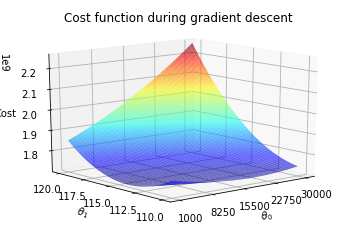

In [34]:
surface_plot((1000, 30000), (110, 120), X_train, y_train)

## $\theta_0$ 與 $\theta_1$ 的坡度差距太大

## 利用標準化（Normalization）來應對

- MinMax scaler:

$$X_{scaled} = \frac{X-X_{min}}{X_{max} - X_{min}}$$

- Standard scaler:

$$X_{scaled} = \frac{X-\mu_X}{\sigma_X}$$

In [35]:
# 自己做 Standard scaler 標準化
X_train_gd = train_df["GrLivArea"].values.reshape(-1, 1)
mu_X = X_train_gd.mean()
sigma_X = X_train_gd.std()
X_train_scaled = (X_train_gd - mu_X)/sigma_X
print(X_train_scaled)

[[-1.12253923]
 [-0.3949409 ]
 [-1.12625147]
 ..., 
 [ 1.18275955]
 [-1.39353249]
 [-0.5582793 ]]


In [36]:
# 請 sklearn 做 Standard scaler 標準化
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_gd.astype(float))
y_train_scaled = ss.fit_transform(y_train.astype(float))
print(X_train_scaled)

[[-1.12253923]
 [-0.3949409 ]
 [-1.12625147]
 ..., 
 [ 1.18275955]
 [-1.39353249]
 [-0.5582793 ]]


In [37]:
ones = np.ones(X_train_scaled.shape[0]).reshape(-1, 1)
X_train_scaled = np.concatenate([ones, X_train_scaled], axis=1)
X_train_scaled

array([[ 1.        , -1.12253923],
       [ 1.        , -0.3949409 ],
       [ 1.        , -1.12625147],
       ..., 
       [ 1.        ,  1.18275955],
       [ 1.        , -1.39353249],
       [ 1.        , -0.5582793 ]])

In [38]:
thetas, cost_J = gradient_descent(X_train_scaled, y_train_scaled)
print("讓成本函數最小的 Thetas")
print(thetas)
plt.plot(cost_J)
plt.ylabel(r"$J(\theta)$")
plt.xlabel('Iterations')

讓成本函數最小的 Thetas
[[ -2.76947415e-17]
 [  6.93103700e-01]]


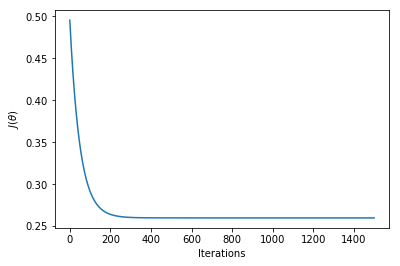

In [39]:
plt.show()

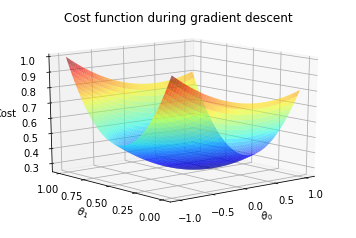

In [40]:
surface_plot((-1, 1), (0, 1), X_train_scaled, y_train_scaled)

## 更適合觀察梯度的圖形

<https://plot.ly/python/3d-surface-plots/>

In [41]:
import plotly.plotly as py
import plotly.graph_objs as go

def get_surface_Z(theta0_range, theta1_range, X, y):
    theta0_start, theta0_end = theta0_range
    theta1_start, theta1_end = theta1_range
    length = 50
    theta0_arr = np.linspace(theta0_start, theta0_end, length).reshape(-1, 1)
    theta1_arr = np.linspace(theta1_start, theta1_end, length).reshape(-1, 1)
    thetas_arr = np.concatenate([theta0_arr, theta1_arr], axis=1)
    Z = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            theta_0 = theta0_arr[i]
            theta_1 = theta1_arr[j]
            thetas_arr = np.array([theta_0, theta_1]).reshape(-1, 1)
            Z[i, j] = compute_cost(X, y, thetas=thetas_arr)
    return Z

Z = get_surface_Z((-5, 5), (-5, 5), X_train_scaled, y_train_scaled)
py.sign_in('tonykuoyj', '6doG9IEHGWlQT7uD9vY8') # Use your own plotly Username / API Key
data = [go.Surface(z=Z)]
layout = go.Layout(
  title='Cost function during gradient descent',
  scene=dict(
      xaxis = dict(title='theta_0'),
      yaxis = dict(title="theta_1"),
      zaxis = dict(title="J(theta)")
  )
)
fig = go.Figure(data=data, layout=layout)

In [42]:
py.iplot(fig, filename='gd-3d-surface')

## 標準化後如何回推 $\theta$

$$
y = \theta_0 + \theta_1x_1 \\
\frac{y - \mu_y}{\sigma_y} = \theta_0' + \frac{x_1-\mu_{x_1}}{\sigma_{x_1}}\theta_1' \\
y = \mu_y+\sigma_y\theta_0'+\frac{\sigma_y}{\sigma_{x_1}}(x_1-\mu_{x_1})\theta_1' \\
y = \mu_y+\sigma_{y}\theta_0'-\frac{\sigma_y\mu_{x_1}}{\sigma_{x_1}}\theta_1'+\frac{\sigma_y}{\sigma_{x_1}}\theta_1'x_1
$$

$$
\theta_0 = \mu_y + \sigma_y\theta_0'-\frac{\sigma_y\mu_{x_1}}{\sigma_{x_1}}\theta_1' \\
\theta_1 = \frac{\sigma_y}{\sigma_{x_1}}\theta_1'
$$

## 隨堂練習：請回推 $\theta$

## Phew...

- 總算完成了兩種找到 $\theta$ 的方式！
- 這是不能忽略的學習步驟，但並不是實作上要採用的

## 有哪些模組可以幫我們找到 $\theta$

- [statsmodel](https://www.statsmodels.org/stable/index.html)
- [scikit-learn](http://scikit-learn.org/stable/)
- [TensorFlow](https://www.tensorflow.org/)

## 我們建議使用 Scikit-Learn

- 比 StatsModel 完整
- TensorFlow 是自成一格的框架

In [43]:
from sklearn.linear_model import LinearRegression

X_train = train_df["GrLivArea"].values.reshape(-1, 1)
y_train = train_df["SalePrice"].values.reshape(-1, 1)
X_valid = validation_df["GrLivArea"].values.reshape(-1, 1)
y_valid = validation_df["SalePrice"].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 評估迴歸模型的指標

- MSE（愈低愈好）

$$MSE = \frac{1}{m}\sum_{i=1}^m(\hat{y_i} - y_i) ^ 2$$

In [44]:
# 自己算
train_MSE= np.mean((y_train - reg.predict(X_train))**2)
validation_MSE= np.mean((y_valid - reg.predict(X_valid))**2)
print("Computation:")
print("Training MSE: {:.4f}".format(train_MSE))
print("Validation MSE: {:.4f}".format(validation_MSE))

Computation:
Training MSE: 3402166887.1990
Validation MSE: 2541490406.3163


## 請 sklearn 幫我們算

In [45]:
# sklearn.metrics
from sklearn.metrics import mean_squared_error

print("\nFrom sklearn.metrics:")
print("Training MSE: {:.4f}".format(mean_squared_error(y_train, reg.predict(X_train))))
print("Validation MSE: {:.4f}".format(mean_squared_error(y_valid, reg.predict(X_valid))))


From sklearn.metrics:
Training MSE: 3402166887.1990
Validation MSE: 2541490406.3163


## 隨堂練習：挑兩個變數來預測 SalePrice

- 試試看 `GrLivArea` 與 `GarageArea`

In [46]:
import matplotlib.pyplot as plt

train_df.plot.scatter("GarageArea", "SalePrice", s=5)

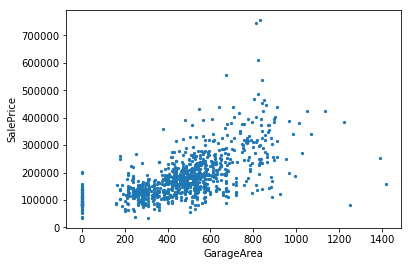

In [47]:
plt.show()

In [48]:
# 訓練樣本
y_train = train_df["SalePrice"].values.reshape(train_df.shape[0], 1)
X_train = train_df[["GrLivArea", "GarageArea"]].values.reshape(train_df.shape[0], 2)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
print(y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 3)


In [49]:
# 驗證樣本
y_validation = validation_df["SalePrice"].values.reshape(validation_df.shape[0], 1)
X_validation = validation_df[["GrLivArea", "GarageArea"]].values.reshape(validation_df.shape[0], 2)
m = X_validation.shape[0]
ones_col = np.ones((m, 1))
X_validation = np.concatenate((ones_col, X_validation), axis=1)
print(y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 3)


In [50]:
# sklearn
from sklearn import linear_model

regressor_skl = linear_model.LinearRegression()
regressor_skl.fit(X_train, y_train)
theta_0_skl = regressor_skl.intercept_[0]
theta_1_skl = regressor_skl.coef_[0][1]
theta_2_skl = regressor_skl.coef_[0][2]

In [51]:
print('Thetas from sklearn:\ntheta_0: {:.4f}\ntheta_1: {:.4f}\ntheta_2: {:.4f}'.format(theta_0_skl, theta_1_skl, theta_2_skl))

Thetas from sklearn:
theta_0: -4600.3771
theta_1: 77.7825
theta_2: 142.7484


In [52]:
from sklearn.metrics import mean_squared_error

train_MSE= np.mean((y_train - regressor_skl.predict(X_train))**2)
validation_MSE= np.mean((y_validation - regressor_skl.predict(X_validation))**2)

In [53]:
print("Computation:")
print("Training MSE: {:.4f}".format(train_MSE))
print("Validation MSE: {:.4f}".format(validation_MSE))

# sklearn.metrics
print("\nFrom sklearn.metrics:")
print("Training MSE: {:.4f}".format(mean_squared_error(y_train, regressor_skl.predict(X_train))))
print("Validation MSE: {:.4f}".format(mean_squared_error(y_validation, regressor_skl.predict(X_validation))))

Computation:
Training MSE: 2682062423.1890
Validation MSE: 1930533819.9319

From sklearn.metrics:
Training MSE: 2682062423.1890
Validation MSE: 1930533819.9319


## 使用有 d 次項的 X 來建立 h

In [54]:
import matplotlib.pyplot as plt

train_df.plot.scatter("YearBuilt", "SalePrice", s=5)

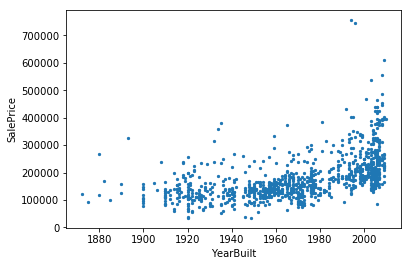

In [55]:
plt.show()

$$ y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + ... + \theta_d x_i^d $$

In [56]:
# 訓練樣本
y_train = train_df["SalePrice"].values.reshape(-1, 1)
X_train = train_df["YearBuilt"].values.reshape(-1, 1)
print(y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 1)


In [57]:
# 驗證樣本
y_validation = validation_df["SalePrice"].values.reshape(-1, 1)
X_validation = validation_df["YearBuilt"].values.reshape(-1, 1)
print(y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 1)


## 使用 `PolynomialFeatures(d)` 與 `fit_transform()` 建立 X

In [58]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures(3).fit_transform(X_train)[0, :]

array([  1.00000000e+00,   1.99600000e+03,   3.98401600e+06,
         7.95209594e+09])

In [59]:
X_train[0, :]

array([1996])

In [60]:
def make_features(train_set, validation_set, degrees):
    train_dict = {}
    validation_dict = {}
    for d in degrees:
        train_dict[d] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1, 1))
        validation_dict[d] = PolynomialFeatures(d).fit_transform(validation_set.reshape(-1, 1))
    return train_dict, validation_dict

In [61]:
degrees = range(11)
train_dict, validation_dict = make_features(X_train, X_validation, degrees)

## 隨堂練習：將不同次方項的 validation error(MSE) 算出來，並找出 error 最小的 degree

```python
def get_best_degree():
    # ...
```

In [62]:
def get_best_degree():
    error_train = np.empty(len(degrees))
    error_validation = np.empty(len(degrees))
    for d in degrees:
        X_train = train_dict[d]
        X_validation = validation_dict[d]
        #set up model
        regressor = linear_model.LinearRegression()
        #fit
        regressor.fit(X_train, y_train)
        #predict
        #your code here
        prediction_on_training = regressor.predict(X_train)
        prediction_on_validation = regressor.predict(X_validation)
        #calculate mean squared error
        error_train[d] = mean_squared_error(y_train, prediction_on_training)
        error_validation[d] = mean_squared_error(y_validation, prediction_on_validation)
    return np.argmin(error_validation), error_validation, error_train

In [63]:
best_degree, error_validation, error_train = get_best_degree()

print("Validation Error:\n")
print(error_validation)
print("\nError 最低的次方是 {}".format(best_degree))

Validation Error:

[  5.74773085e+09   4.22306392e+09   3.76996972e+09   3.81499577e+09
   3.81482104e+09   3.81463312e+09   3.81443382e+09   3.81422447e+09
   3.81400642e+09   3.81378108e+09   3.81354988e+09]

Error 最低的次方是 2


In [64]:
plt.plot(degrees, error_train, marker='o', label='train')
plt.plot(degrees, error_validation, marker='o', label='validation')
plt.axvline(best_degree, 0, 0.5, color='r', label="Minimum validation error at d={}".format(best_degree), alpha=0.3)
plt.ylabel('MSE')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

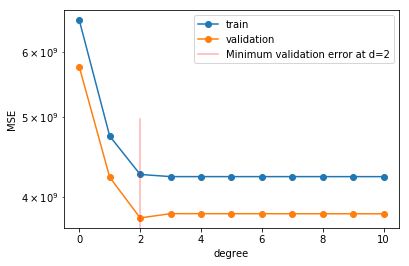

In [65]:
plt.show()

In [66]:
def get_plot():
    d = 2
    X_train = train_dict[d]
    X_validation = validation_dict[d]
    regressor = linear_model.LinearRegression()
    # fitting
    regressor.fit(X_train, y_train)
    prediction_on_training = regressor.predict(X_train)
    prediction_on_validation = regressor.predict(X_validation)
    x_arr = np.linspace(train_df["YearBuilt"].min(), train_df["YearBuilt"].max(), num=1000)
    x_arr_poly = PolynomialFeatures(d).fit_transform(x_arr.reshape(-1, 1))
    y_arr = regressor.predict(x_arr_poly)
    # plotting
    plt.scatter(train_df["YearBuilt"], train_df["SalePrice"], s=5)
    plt.plot(x_arr, y_arr, 'r-', alpha=0.5, label = "Fit", linewidth=4)
    plt.xlabel('$YearBuilt$');
    plt.ylabel('$SalePrice$')
    plt.legend(loc="upper left")
    plt.show()

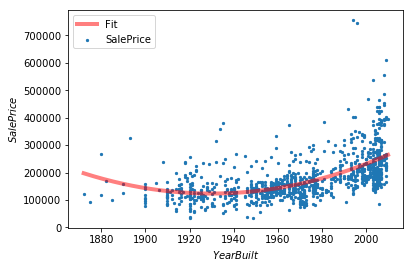

In [67]:
get_plot()

## 隨堂練習：在上圖加入 d=1 與 d=3 的線

In [68]:
def get_plot():
    y_arrays = []
    for d in [1, 2, 3]:
        X_train = train_dict[d]
        X_validation = validation_dict[d]
        regressor = linear_model.LinearRegression()
        #fit
        regressor.fit(X_train, y_train)
        prediction_on_training = regressor.predict(X_train)
        prediction_on_validation = regressor.predict(X_validation)
        x_arr = np.linspace(train_df["YearBuilt"].min(), train_df["YearBuilt"].max(), num=1000)
        x_arr_poly = PolynomialFeatures(d).fit_transform(x_arr.reshape(-1, 1))
        y_arr = regressor.predict(x_arr_poly)
        y_arrays.append(y_arr)
    plt.scatter(train_df["YearBuilt"], train_df["SalePrice"], s=5)
    plt.plot(x_arr, y_arrays[0], 'r-', alpha=0.5, label = "Degree={}".format(1), linewidth=3)
    plt.plot(x_arr, y_arrays[1], 'g-', alpha=0.5, label = "Degree={}".format(2), linewidth=3)
    plt.plot(x_arr, y_arrays[2], 'm-', alpha=0.5, label = "Degree={}".format(3), linewidth=3)
    plt.xlabel('$YearBuilt$');
    plt.ylabel('$SalePrice$')
    plt.legend(loc="upper left")
    plt.show()

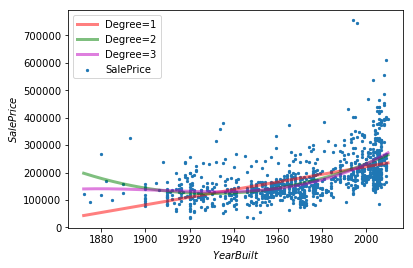

In [69]:
get_plot()

## 在不設定 `random_state` 參數的情況下切割訓練與驗證樣本

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 切割訓練與驗證樣本
train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
labeled = pd.read_csv(train_url)
train_df, validation_df = train_test_split(labeled, test_size=0.3)
y_train = train_df["SalePrice"].values.reshape(-1, 1)
X_train = train_df["YearBuilt"].values.reshape(-1, 1)
y_validation = validation_df["SalePrice"].values.reshape(-1, 1)
X_validation = validation_df["YearBuilt"].values.reshape(-1, 1)

degrees = range(1, 11)
error_train = np.empty(len(degrees))
error_validation = np.empty(len(degrees))
for d in degrees:
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    X_validation_poly = PolynomialFeatures(d).fit_transform(X_validation)
    regressor = LinearRegression()
    regressor.fit(X_train_poly, y_train)
    prediction_on_training = regressor.predict(X_train_poly)
    prediction_on_validation = regressor.predict(X_validation_poly)
    #calculate mean squared error
    error_train[d - 1] = mean_squared_error(y_train, prediction_on_training)
    error_validation[d - 1] = mean_squared_error(y_validation, prediction_on_validation)

best_degree = np.argmin(error_validation) + 1
print("Validation Error:\n")
print(error_validation)
print("\nError 最低的次方是 {}".format(best_degree))

Validation Error:

[  5.34610683e+09   4.76651988e+09   4.81763464e+09   4.81810773e+09
   4.81855480e+09   4.81897636e+09   4.81937291e+09   4.81974502e+09
   4.82009336e+09   4.82041864e+09]

Error 最低的次方是 2


In [71]:
import matplotlib.pyplot as plt

plt.plot(degrees, error_train, marker='o', label='train')
plt.plot(degrees, error_validation, marker='o', label='validation')
plt.axvline(best_degree, 0, 0.5, color='r', label="Minimum validation error at d={}".format(best_degree), alpha=0.3)
plt.ylabel('MSE')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

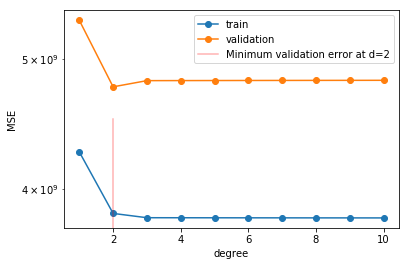

In [72]:
plt.show()

## 重複執行前面的程式碼

- 發現驗證資料的 error_validation 與 best_degree 每次都不一樣，這是什麼緣故？

## 交叉驗證 Cross-Validation

## 隨機的 `train_test_split()`

- 憑藉單次隨機給予模型的訓練、驗證樣本就決定 best_degree 與 MSE 有些大意
- 我們需要一個機制來因應這樣的隨機性

## 交叉驗證示意圖

![](images/train-cv2.png)

Source: [CS109 Data Science](http://cs109.github.io/2015/index.html)

## 交叉驗證的步驟

1. 將 labeled data 切分為 `n_folds`
2. 將 `n_folds - 1` 作為訓練樣本，剩餘的一個 fold 作為驗證樣本
3. 將所有 folds 所求得的 MSE 平均
4. 選擇評估最佳的設定再應用至測試樣本

In [73]:
from sklearn.model_selection import KFold

n_folds = 4
labeled_data_m = labeled.shape[0]
kfold = KFold(n_folds)

In [74]:
list(kfold.split(range(labeled_data_m)))[0]

(array([ 365,  366,  367, ..., 1457, 1458, 1459]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,


## 這樣有什麼問題？

In [75]:
kfold = KFold(n_folds, shuffle=True)
list(kfold.split(range(labeled_data_m)))[0]

(array([   0,    3,    4, ..., 1456, 1458, 1459]),
 array([   1,    2,    5,    8,    9,   11,   15,   23,   24,   25,   26,
          27,   28,   29,   36,   43,   56,   57,   59,   60,   61,   62,
          70,   77,   78,   79,   80,   83,   87,   88,   94,  100,  104,
         111,  117,  121,  126,  138,  143,  148,  149,  153,  158,  159,
         165,  166,  167,  173,  175,  179,  184,  187,  189,  190,  195,
         197,  198,  203,  204,  214,  215,  216,  218,  223,  225,  226,
         228,  231,  239,  244,  249,  250,  264,  265,  273,  274,  276,
         290,  297,  300,  301,  303,  307,  315,  323,  325,  331,  333,
         336,  339,  351,  353,  354,  358,  361,  364,  367,  368,  377,
         380,  388,  389,  393,  403,  404,  407,  408,  411,  415,  416,
         423,  427,  429,  430,  432,  437,  440,  445,  447,  449,  452,
         453,  456,  459,  460,  461,  464,  465,  467,  468,  471,  478,
         492,  496,  506,  507,  510,  512,  513,  514,  517,

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 切割訓練與驗證樣本
train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
labeled = pd.read_csv(train_url)
y = labeled["SalePrice"].values.reshape(-1, 1)
X = labeled[["GrLivArea", "YearBuilt", "GarageArea", "TotalBsmtSF"]].values

degrees = range(1, 11)
cv_error = np.empty(len(degrees))
for d in degrees:
    X_poly = PolynomialFeatures(d).fit_transform(X)
    regressor = LinearRegression()
    cv_score = cross_val_score(regressor, X_poly, y, scoring="neg_mean_squared_error")
    cv_error[d - 1] = cv_score.mean()

best_degree = np.argmin(np.absolute(cv_error)) + 1
print("CV Error:\n")
print(np.absolute(cv_error))
print("\nError 最低的次方是 {}".format(best_degree))

CV Error:

[  1.88924474e+09   1.69883010e+09   1.58725356e+09   7.34165929e+10
   6.06317865e+12   1.31150214e+15   5.22649401e+17   3.10338252e+18
   1.19258851e+22   1.08156495e+25]

Error 最低的次方是 3


In [77]:
plt.plot(degrees, np.absolute(cv_error), marker='o', label='Cross Validated')
plt.axvline(best_degree, 0, 0.5, color='r', label="Minimum cv error at d={}".format(best_degree), alpha=0.3)
plt.ylabel('MSE')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

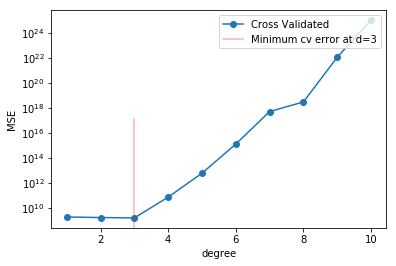

In [78]:
plt.show()

## 正規化 regularization

## 目前加入變數、納入次方項與交叉驗證已經很不錯

- 但有可能碰上什麼麻煩？

In [79]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]).reshape(-1, 1)

# Fitting
lr = linear_model.LinearRegression()
pr_q = linear_model.LinearRegression()
pr_6 = linear_model.LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
power_of_6 = PolynomialFeatures(degree = 6)
X_quad = quadratic.fit_transform(X)
X_p6 = power_of_6.fit_transform(X)
lr.fit(X, y)
X_fit = np.linspace(250, 600, 100).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)
pr_q.fit(X_quad, y)
y_quad_fit = pr_q.predict(quadratic.fit_transform(X_fit))
pr_6.fit(X_p6, y)
y_p6_fit = pr_6.predict(power_of_6.fit_transform(X_fit))

In [80]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize = (14, 4))
plt.subplot(1, 3, 1)
plt.scatter(X, y)
plt.plot(X_fit, y_lin_fit, linestyle = "--", c = "r")
plt.title("Under-fitting($\\theta_0 + \\theta_1x_1$)")
plt.subplot(1, 3, 2)
plt.scatter(X, y)
plt.plot(X_fit, y_quad_fit, linestyle = "--", c = "r")
plt.title("Appropriate fitting($\\theta_0 + \\theta_1x_1 + \\theta_2x_1^2$)")
plt.subplot(1, 3, 3)
plt.scatter(X, y)
plt.plot(X_fit, y_p6_fit, linestyle = "--", c = "r")
plt.title("Over-fitting($\\theta_0 + \\theta_1x_1 + \\theta_2x_1^2 + ... \\theta_6x_1^6$)")
plt.tight_layout()

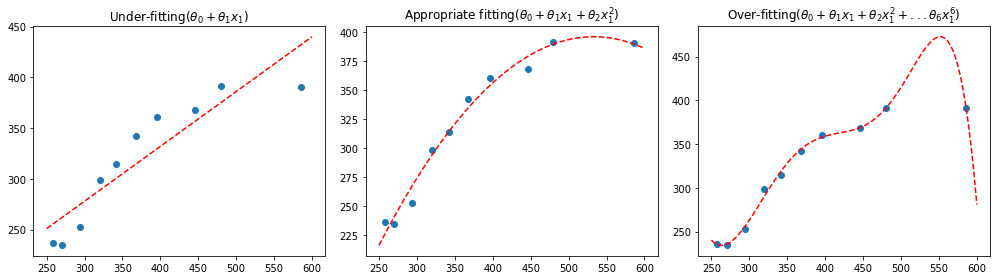

In [81]:
plt.show()

## 過度配適 Overfitting 的麻煩

|Bias|Variance|Fitting|
|----|--------|-------|
|High|Low|Under-fitting|
|Medium|Medium|Appropriate fitting|
|Low|High|Over-fitting|

## 如果我們採用了高的 degrees

- 想個辦法去平滑它：Ridge 方法（$C$ 為一個常數）

$$\sum_{i=0}^d \theta_i^2 < C$$

- 在成本函數後面加入 $\lambda\sum_{i=0}^d \theta_i^2$ 來消弭 $\theta_i$

$$J(\theta)_{Ridge} = \sum_{i=1}^{m}(\hat{y_i}-y_i)^2 + \lambda \sum_{i=0}^d \theta_i^2$$

## 觀察 $\lambda$ 上升，$\theta_i$ 是否顯著地降低

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# 切割訓練與驗證樣本
train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
labeled = pd.read_csv(train_url)
train, validation = train_test_split(labeled, test_size=0.3)
y_train = train["SalePrice"].values.reshape(-1, 1)
X_train = train[["GrLivArea", "YearBuilt", "GarageArea", "TotalBsmtSF"]].values

fig, axes = plt.subplots(5, 1, figsize=(12, 16))
d = 3
lambdas = [1, 10**2, 10**4, 10**6, 10**8]
for i in range(len(lambdas)):
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    ridge = Ridge(alpha=lambdas[i])
    ridge.fit(X_train_poly, y_train)
    thetas = ridge.coef_.ravel()
    print("lambda: {}, thetas:".format(lambdas[i]))
    print(thetas)
    axes[i].semilogy(np.abs(thetas), marker='o', label="alpha = {}".format((lambdas[i])))
    axes[i].axhline(y=1, linestyle="dashed", linewidth=2, color="r")
    axes[i].set_ylabel('abs(coefficient)')
    axes[i].set_xlabel('coefficients')
    axes[i].legend(loc='upper right')

lambda: 1, thetas:
[  0.00000000e+00   5.26714855e+03   3.65037385e+03   6.03334599e+04
   1.45543490e+04  -1.15925636e+00  -4.44291406e+00   6.10256364e-01
   1.05478943e+00   8.10171932e+00  -6.36450336e+01  -1.49018040e+01
   1.01761562e+00   8.73887754e-01  -1.44585494e+00   2.92621412e-05
   5.78676225e-04  -4.80268241e-05  -8.17262604e-05   8.88779161e-04
  -3.99768024e-04  -3.99962603e-04   7.79663344e-05   2.56021165e-04
  -5.27850113e-05  -3.05696854e-03   1.68642923e-02   3.79898958e-03
  -5.19821684e-04  -6.75401277e-04   7.24823474e-04   1.66570372e-05
  -1.61247566e-04   9.79021084e-05   1.74720413e-05]
lambda: 100, thetas:
[  0.00000000e+00   1.59441965e+03   6.56288242e+01   1.69785618e+03
   8.73434157e+02  -1.14929447e+00  -1.03317167e+00   1.34038382e+00
   1.46454471e+00  -1.11389670e+00  -2.69178697e+00  -4.81172721e-01
   8.62872201e-03  -1.46956852e+00  -1.77945387e+00   2.61727887e-05
   5.78688054e-04  -5.35920640e-05  -7.28802427e-05   1.03973092e-04
  -7.73342

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.597081e-24

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.597081e-22

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.593793e-20

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.593056e-18



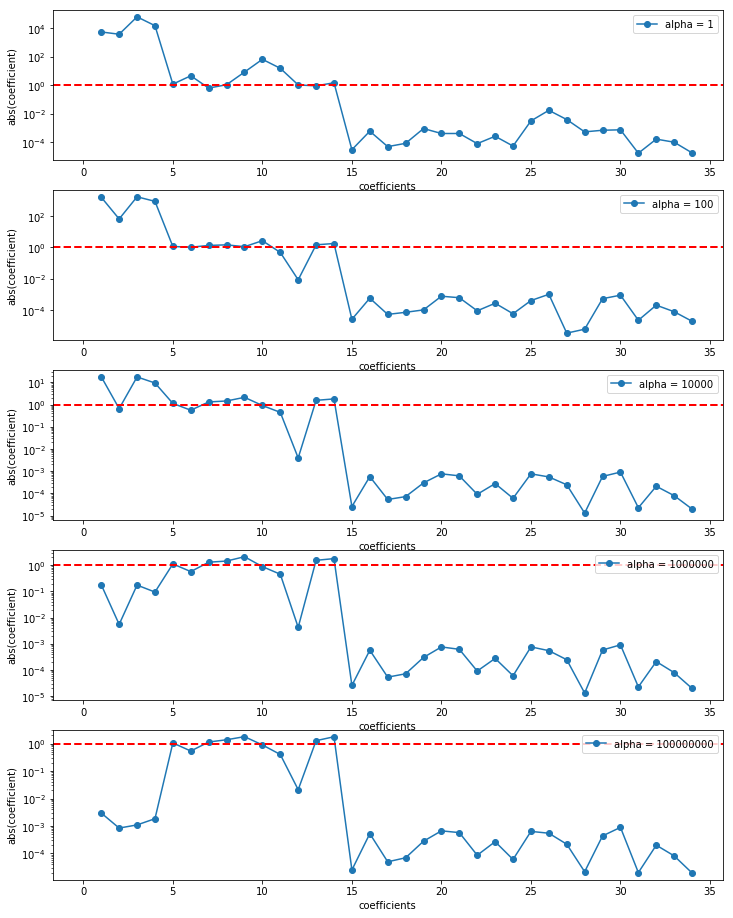

In [83]:
plt.show()

## 那我們又該如何找到合適的 $\lambda$ 呢？

## 網格搜尋 GridSearch

## `GridSearchCV()` 函數

- 能夠幫助我們挑選 **Hyper Parameters**
- 整合了交叉驗證

```python
from sklearn.model_selection import GridSearchCV

regressor = Ridge()
parameters = {"alpha": [1, 10, 10**2, 10**3, 10**4, 10**5]}
gridclassifier=GridSearchCV(regressor, param_grid=parameters, cv=4, scoring="neg_mean_squared_error")
```

In [84]:
from sklearn.model_selection import GridSearchCV

def cv_optimize_ridge(X, y, n_folds=4):
    regressor = Ridge()
    parameters = {"alpha": [1, 10, 10**2, 10**3, 10**4, 10**5]}
    gs = GridSearchCV(regressor, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error")
    gs.fit(X, y)
    return gs

In [85]:
fit_model = cv_optimize_ridge(X_train, y_train, n_folds=4)

In [86]:
print(fit_model.best_estimator_)
print(fit_model.best_params_)
print(fit_model.best_score_)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 1}
-2118861006.65


In [87]:
best_alpha = fit_model.best_params_['alpha']
regressor = Ridge(alpha=best_alpha).fit(X_train,y_train)